In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

users_req_rate = [42, 70, 86, 145, 186, 342 ]
user_req_completion_time = [109, 95, 88, 90, 82, 80]
Mem = [27856, 27928, 27887, 27848, 27901, 27949]
CPU = [5500, 6000, 7000, 6300, 6800, 6850]
PID = [1.93000000e+02,1.95000000e+02,1.97000000e+02,1.99000000e+02,2.01000000e+02,2.03000000e+02,2.05000000e+02,2.07000000e+02,2.09000000e+02,2.11000000e+02]

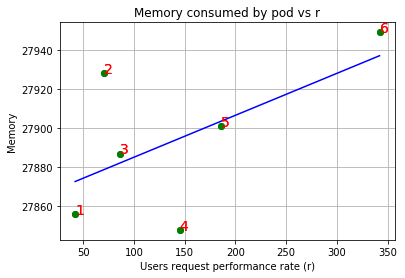

Value of beta_0m [ 27863.73310836]
Value of other regression coefficients: [[ 0.21423806]]


In [11]:
#Memory Estimation
X = np.array(users_req_rate).reshape(-1, 1)
Y = np.array(Mem).reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(users_req_rate,Mem,'go', linewidth=2)
for i,j,k in zip(users_req_rate,Mem,range(1,len(Mem)+1)):
    plt.annotate(str(k),xy=(i,j),color='r', fontsize=14)
plt.plot(X, Y_pred, color='blue')
plt.xlabel('Users request performance rate (r)')
plt.ylabel('Memory')
plt.grid(True)
plt.title("Memory consumed by pod vs r")
plt.show()

print 'Value of beta_0m',linear_regressor.intercept_
print 'Value of other regression coefficients:',linear_regressor.coef_

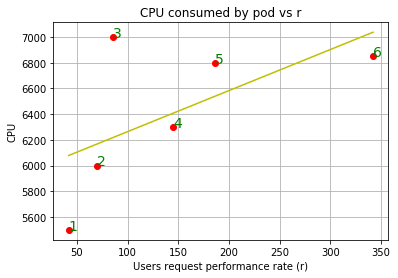

Value of beta_0m [ 5944.55663859]
Value of other regression coefficients: [[ 3.19478779]]


In [22]:
#CPU Estimation
X = np.array(users_req_rate).reshape(-1, 1)
Y = np.array(CPU).reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.plot(users_req_rate,CPU,'ro', linewidth=2)
for i,j,k in zip(users_req_rate,CPU,range(1,len(CPU)+1)):
    plt.annotate(str(k),xy=(i,j),color='g', fontsize=14)
plt.plot(X, Y_pred, color='y')
plt.xlabel('Users request performance rate (r)')
plt.ylabel('CPU')
plt.grid(True)
plt.title("CPU consumed by pod vs r")
plt.show()
print 'Value of beta_0m',linear_regressor.intercept_
print 'Value of other regression coefficients:',linear_regressor.coef_

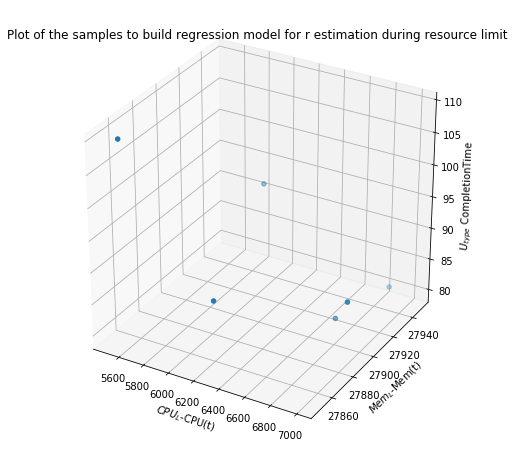

Value of beta_0plimited [-9860.61187543]
Value of other regression coefficients: [[ -0.11887397   0.42935114 -13.3358369 ]]


In [8]:
#Estimate the value of performance rate (r) during  resource limit (global estimation using cluster reserved resources)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(CPU, Mem,user_req_completion_time, 'gray' )
ax.set_xlabel('$CPU_L$-CPU(t)')
ax.set_ylabel('$Mem_L$-Mem(t)')
ax.set_zlabel('$U_{type}$ CompletionTime')
ax.set_title('Plot of the samples to build regression model for r estimation during resource limit')
plt.show()

X=np.array([CPU,Mem,user_req_completion_time])
X= X.T
Y = np.array(users_req_rate).reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions

print 'Value of beta_0plimited',linear_regressor.intercept_
print 'Value of other regression coefficients:',linear_regressor.coef_

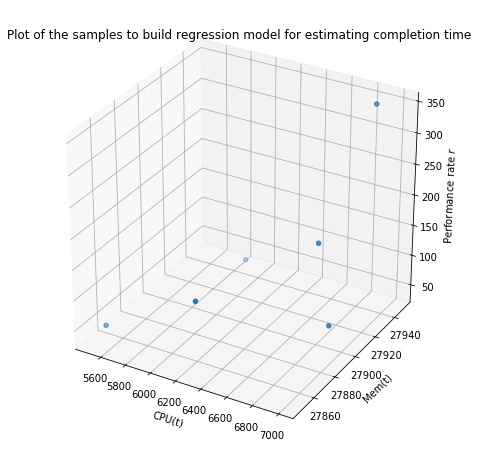

Value of beta_0C,M,U_type [ 669.77102418]
Value of other regression coefficients: [[-0.01240054 -0.01774736 -0.03153595]]


In [24]:
#Estimate of the completion time of user's request processing
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(CPU, Mem,users_req_rate, 'gray' )
ax.set_xlabel('CPU(t)')
ax.set_ylabel('Mem(t)')
ax.set_zlabel('Performance rate $r$')
ax.set_title('Plot of the samples to build regression model for estimating completion time')
plt.show()

X=np.array([CPU,Mem,users_req_rate])
X= X.T
Y = np.array(user_req_completion_time).reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions

print 'Value of beta_0C,M,U_type',linear_regressor.intercept_
print 'Value of other regression coefficients:',linear_regressor.coef_